In [56]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

## Problem 5.1

Let $X = Z^2$, where $Z \sim N(0, 1)$ is a standard normal.  The random variable $X$ has a ${chi-squared}$ distribution with 1 degree of freedom.  For each of the following problems calculate the answer in the following two ways:

(A). using Monte Carlo methods, sampling with $numpy.random.randn$, and taking the number of samples equal to $10^k$ for each value of $k$ = 2, 4, 6.

(B). using the appropriate built-in function from $scipy.stats.chi2$ and compare the results of the previous conputations.

(i) Plot the p.d.f. of your random variable $X$ (experiment to find a good number of bins for your histogram)

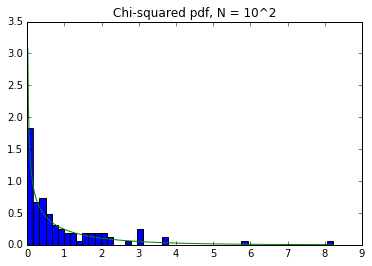

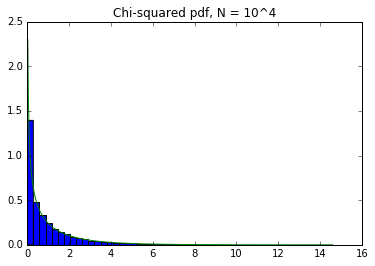

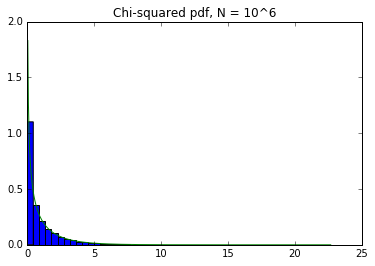

In [62]:
for k in range(2,7,2):
    # draw samples
    samples = np.random.randn(10**k)**2
    
    # make graphs
    plt.hist(samples, bins = 50, normed=True)
    plt.title("Chi-squared pdf, N = 10^{}".format(k))
    X = np.linspace(0,samples.max(),500)
    plt.plot(X,stats.chi2(1).pdf(X))
    plt.show()

(ii) Compute the c.d.f. $F_{x}(x)$ for $x$ = 0.5, 1.0, 1.5.

In [73]:
print("n\testimate\tactual\t\terror\n")

# loop over values of x
for x in [.5,1.,1.5]:
    print("\n--- x = {} ---".format(x))
    
    # loop over k
    for k in range(2,7,2):
        
        # draw samples and calculate estimate
        samples = np.random.randn(10**k)**2
        estimate = np.mean((samples <= x)*1)
        error = np.abs(stats.chi2(1).cdf(x) - estimate)
        
        # round estimate so that things print out in a pretty way
        if k == 6:
            estimate = round(estimate,5)
            
        # print results
        print("10^{}\t{}\t\t{}\t{}".format(k,estimate,stats.chi2(1).cdf(x), round(error,5)))

n	estimate	actual		error


--- x = 0.5 ---
10^2	0.49		0.520499877813	0.0305
10^4	0.5291		0.520499877813	0.0086
10^6	0.51973		0.520499877813	0.00077

--- x = 1.0 ---
10^2	0.76		0.682689492137	0.07731
10^4	0.684		0.682689492137	0.00131
10^6	0.68302		0.682689492137	0.00033

--- x = 1.5 ---
10^2	0.74		0.77932863808	0.03933
10^4	0.7801		0.77932863808	0.00077
10^6	0.77962		0.77932863808	0.00029


(iii) Compute the expected value $E[X]$

In [74]:
print("n\testimate")
for k in range(2,7,2):
    
    #draw samples
    samples = np.random.randn(10**k)**2
    print("10^{}\t{}".format(k, samples.mean()))
    
print("Actual: {}".format(stats.chi2(1).mean()))

n	estimate
10^2	1.2242127398
10^4	0.989866823223
10^6	1.00006562597
Actual: 1.0


(iv) Compute the variance Var($X$)

In [75]:
print("n\testimate")
for k in range(2,7,2):
    
    # draw samples
    samples = np.random.randn(10**k)**2
    est_mu = samples.mean()
    
    # estimate variance
    est_var = np.mean((samples - np.ones_like(samples)*est_mu)**2)
    print("10^{}\t{}".format(k, est_var))
print("Actual: {}".format(stats.chi2(1).var()))

n	estimate
10^2	1.91702928828
10^4	2.11673483593
10^6	2.00500593057
Actual: 2.0


## Problem 5.2

Write python code to approximate $\pi$ using the Monte Carlo methods in the reading, by sampling pairs from the uniform distribution on [-1, 1] $\times$ [-1, 1] and counting the proportion that lie inside the circle $x^2 + y^2 \leq 1$.  Sample $10^k$ times for $k$ = 2, 4, 6 and compare the results to the true value of $\pi$.  Calculate the (approximate) standard error for each of these estimates.

In [20]:
for k in range(2,7,2):
    n = 10**k
    
    # draw samples, calculate distance, and see if it is in the circle
    points = np.random.rand(2,n)*2 - 1
    distance = np.linalg.norm(points, axis=0)
    in_circle = np.sum(distance < 1)
    
    # estimate pi and the variance
    pi_estimate = 4.*(in_circle/np.float(n))
    var_estimate = np.mean((4.*in_circle - np.ones_like(in_circle)*pi_estimate)**2)
    
    # display results
    print("n=10^{}\nEstimate for pi:\t\t{}\nActual Error:\t\t\t{}".format(k,pi_estimate, np.abs(pi_estimate - np.pi)))
    print("Estimate for standard error:\t{}\n\n".format(np.sqrt(var_estimate/n)))

n=10^2
Estimate for pi:		3.32
Actual Error:			0.17840734641
Estimate for standard error:	32.868


n=10^4
Estimate for pi:		3.1172
Actual Error:			0.0243926535898
Estimate for standard error:	311.688828


n=10^6
Estimate for pi:		3.141736
Actual Error:			0.000143346410207
Estimate for standard error:	3141.73285826




## Problem 5.3

There are at least two different Monte Carlo methods you could use to approximate of the area under the curve $y = e^{cos(x^2)}$ for $x \in$ [0, 2]

(i) Estimate the area under the curve using the method discussed in class: find

$$\int_0^2 h(x) dx = 2 \int_0^2 h(x) f_{Unif([0, 2])}(x) dx = 2\mathbb{E}[h \circ X]$$

by approximating $\mathbb{E}[h \circ X]$ at least $10^5$ times.  What is the (approximate value of the) standard error?

In [17]:
n1 = 10**5

# draw samples, create function, estimate area according to above, and estimate variance according the the book
samples = np.random.rand(n1)*2
h = lambda x : np.exp(np.cos(x**2))
area_estimate1 = 2 * np.mean(h(samples))
var_estimate1 = np.mean((h(samples) - np.ones_like(samples)*area_estimate1)**2)

(ii) Estimate the are under the curve by taking a 2d-sample $Z \sim$ Unif([0, 2]) $\times$ Unif([0, $b$]) for some $b$ with $b \geq max_{x \in [0, 2]} e^{cos(x^2)}$. and the ncount (and scale appropriately) the samples that lie under the curve.  This corresponds to a estimating a multiple of $\mathbb{E}[h \circ X]$, where $k = \mathbb{1}_A$ and $A = \{(x, y) | 0 \leq y \leq e^{cos(e^x)}\}$.  Sample at least %5 \times 10^5$ times.  What is the (approxiamte value of the) standard error?

In [18]:
n2 = int(5*10e4)
b = np.e                    # since cos has a maximum of 1, the max of e^cos(x^2) is e

# sample along the two dimensions
X = np.random.rand(n2)*2
Y = np.random.rand(n2)*b

# calculate what fraction are below the function, then estimate integral and variance estimate
below_function = (Y <= h(X))
num_below_function = np.sum(below_function)
area_estimate2 = np.mean(below_function)*2*b
var_estimate2 = np.mean((b*2*below_function - np.ones_like(below_function)*area_estimate2)**2)

Compare the results of the two methods.

In [51]:
print("Method i\nArea Estimate:\t\t\t{}\nStandard Error Estimate:\t{}\n\n".format(area_estimate1, np.sqrt(var_estimate1/n1)))
print("Method ii\nArea Estimate:\t\t\t{}\nStandard Error Estimate:\t{}".format(area_estimate2, np.sqrt(var_estimate2/n2)))

Method i
Area Estimate:			3.2229542621
Standard Error Estimate:	0.00590385518294


Method ii
Area Estimate:			3.23339623495
Standard Error Estimate:	0.00377457633309


COMPARISON: The methods provide similar estimates, but the standard error for method ii is slightly better.

## Problem 5.4

Use Monte Carlo methods to estimate the probability that a sample from Beta(2, 5) will be less than a sample from Beta(20, 55).  How many samples are require to give 95% confidence that your answer is correct to 3 decimal places?

In [36]:
n = 10**6

# sample from the two distributions
beta1 = np.random.beta(2,5,n)
beta2 = np.random.beta(20,55,n)

# calculate estimates
less_than = (beta1 < beta2)*1
estimate = np.mean(less_than)
var_est = np.mean((less_than - np.ones_like(less_than)*estimate)**2)
standard_error = np.sqrt(var_est/n)
print("Estimate:\t\t\t{}\nStandard Error Estimate:\t{}".format(estimate, standard_error))
print("N must be greater than {}".format(int(4*var_est/(.001**2)+1)))

Estimate:			0.500437
Standard Error Estimate:	0.000499999809031
N must be greater than 1000000


## Problem 5.5

Consider a game where you roll a fair four-sided dice with sides labeled 1, 2, 3, and 4.  You win one dollar if the die shows 1 or 2, you win two dollars if the die shows 3, and you lose on dollar if the die shows 4.  Use monte Carlo simulation methods to estimate the probability that your winnings will be negative after ten rolls of the die.  Justify your choice of the number of samples to use.

In [50]:
def prize(x):
    '''
    a function accepts a vector of len(10) consisting of integers from the set {1,2,3,4}
    returns the total prize where 1 and 2 awards 1 dollar, 3 awards 2 dollars, and 4 costs 1 dollar
    '''
    if len(x) != 10:
        raise ValueError("len must be 10 not {}".format(len(x)))
    one = (x < 3)*1
    two = (x == 3)*2
    lose = (x > 3)*-1
    return np.sum(one+two+lose)

# sample, calculate prize for each sample, then calculate estimate and variance estimate
n = 55000
samples = np.random.randint(1,5,(n,10))
values = np.apply_along_axis(prize, 1, samples)
negative = (values < 0)*1
estimate = negative.mean()
var_est = np.mean((negative - np.ones_like(negative)*estimate)**2)

standard_error = np.sqrt(var_est/n)
print("Estimate:\t\t\t{}\nStandard Error Estimate:\t{}".format(estimate, standard_error))
print("\nI justify my choice of N={} by choosing it to be greater\nthan the number to make the error less than .001, shown below.\n\n(Same as last question) N must be greater than {}".format(n, int(4*var_est/(.001**2)+1)))

Estimate:			0.0127818181818
Standard Error Estimate:	0.000478984594662

I justify my choice of N=55000 by choosing it to be greater
than the number to make the error less than .001, shown below.

(Same as last question) N must be greater than 50474
